In [4]:
import os, shutil, PIL
original_dataset_dir = '../data/primary_small/'
train_dir = os.path.join(original_dataset_dir, 'train')
validation_dir = os.path.join(original_dataset_dir, 'valid')
test_dir = os.path.join(original_dataset_dir, 'test')

In [5]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu',
                       input_shape=(150,150,3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(7, activation='sigmoid'))

In [6]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
batch_normalization_5 (Batch (None, 148, 148, 32)      128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
batch_normalization_6 (Batch (None, 34, 34, 128)      

In [7]:
from keras import optimizers

model.compile(loss='categorical_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [8]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150,150),
        batch_size=20,
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
            validation_dir,
            target_size=(150,150),
            batch_size=20,
            class_mode='categorical')

Found 5600 images belonging to 7 classes.
Found 700 images belonging to 7 classes.


In [9]:
history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=30,
validation_data=validation_generator,
validation_steps=50)

Epoch 1/30
100/100 [==============================] - 129s 1s/step - loss: 1.8183 - acc: 0.2995 - val_loss: 2.1095 - val_acc: 0.1450
Epoch 2/30
100/100 [==============================] - 155s 2s/step - loss: 1.6963 - acc: 0.3335 - val_loss: 2.1367 - val_acc: 0.1450
Epoch 3/30
100/100 [==============================] - 160s 2s/step - loss: 1.6123 - acc: 0.3820 - val_loss: 4.6884 - val_acc: 0.1320
Epoch 4/30
100/100 [==============================] - 163s 2s/step - loss: 1.5354 - acc: 0.3975 - val_loss: 5.3257 - val_acc: 0.1480
Epoch 5/30
100/100 [==============================] - 163s 2s/step - loss: 1.5299 - acc: 0.3940 - val_loss: 5.4103 - val_acc: 0.1410
Epoch 6/30
100/100 [==============================] - 166s 2s/step - loss: 1.4609 - acc: 0.4295 - val_loss: 3.9360 - val_acc: 0.1440
Epoch 7/30
100/100 [==============================] - 168s 2s/step - loss: 1.3646 - acc: 0.4420 - val_loss: 3.9652 - val_acc: 0.1560
Epoch 8/30
100/100 [==============================] - 167s 2s/step - 

In [11]:
model.save('seti_small_2.h5')

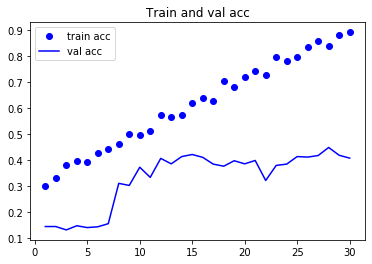

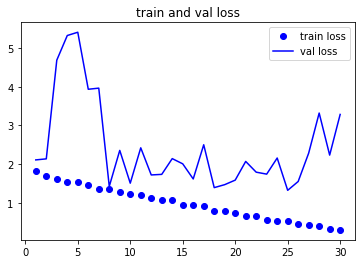

In [13]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='train acc')
plt.plot(epochs,val_acc, 'b', label='val acc')
plt.title('Train and val acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='train loss')
plt.plot(epochs,val_loss, 'b',label='val loss')
plt.title('train and val loss')
plt.legend()

plt.show()

Training accuracy much improved, but validation shows that we are overfitting. Shall I try Batch Norm with dropout?